## Loading the DataSet in Python Dataframe using Pandas

In [ ]:
data=pd.read_csv('/content/sample_data/Wind_Dataset.csv', sep='\t',encoding='utf-16')
data.head(3)


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction in Degree
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789


# Data Preprocessing and Analysing

## Renaming the Column

In [ ]:
data.rename(columns = {'LV ActivePower (kW)':'ActivePower',
                       "Wind Speed (m/s)":"WindSpeed",
                       "Wind Direction in Degree":"WindDirection","Theoretical_Power_Curve (KWh)":"TheoreticalPowerCurve"},
            inplace = True)
data.head(1)

,Date/Time,ActivePower,WindSpeed,TheoreticalPowerCurve,WindDirection
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904


## Handling the null values

In [ ]:
data.isnull().sum() # no null values found

Date/Time                0
ActivePower              0
WindSpeed                0
TheoreticalPowerCurve    0
WindDirection            0
dtype: int64

##  to_datetime() method to convert string Date time into Python Date time object

In [ ]:
data['Date/Time']=pd.to_datetime(data['Date/Time'])
print(data['Date/Time'].head(5))

0   2018-01-01 00:00:00
1   2018-01-01 00:10:00
2   2018-01-01 00:20:00
3   2018-01-01 00:30:00
4   2018-01-01 00:40:00
Name: Date/Time, dtype: datetime64[ns]


In [ ]:
data.describe()

,ActivePower,WindSpeed,TheoreticalPowerCurve,WindDirection,year,month,day,Hour,minute
count,50530.000000,50530.000000,50530.000000,50530.000000,50530.0,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559,2018.0,6.565110,15.569602,11.517356,24.997625
std,1312.459242,4.227166,1368.018238,93.443736,0.0,3.395372,8.756904,6.934626,17.077802
min,-2.471405,0.000000,0.000000,0.000000,2018.0,1.000000,1.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437,2018.0,4.000000,8.000000,5.000000,10.000000
50%,825.838074,7.104594,1063.776282,73.712978,2018.0,7.000000,16.000000,12.000000,20.000000
75%,2482.507568,10.300020,2964.972462,201.696720,2018.0,10.000000,23.000000,18.000000,40.000000
max,3618.732910,25.206011,3600.000000,359.997589,2018.0,12.000000,31.000000,23.000000,50.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date/Time              50530 non-null  datetime64[ns]
 1   ActivePower            50530 non-null  float64       
 2   WindSpeed              50530 non-null  float64       
 3   TheoreticalPowerCurve  50530 non-null  float64       
 4   WindDirection          50530 non-null  float64       
 5   year                   50530 non-null  int64         
 6   month                  50530 non-null  int64         
 7   day                    50530 non-null  int64         
 8   Hour                   50530 non-null  int64         
 9   minute                 50530 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 3.9 MB


##  Creating separate Date, Month, Year, Hour, Minute column

In [ ]:
data['year'] = data['Date/Time'].dt.year 
data['month'] = data['Date/Time'].dt.month 
data['day'] = data['Date/Time'].dt.day
data['Hour'] = data['Date/Time'].dt.hour 
data['minute'] = data['Date/Time'].dt.minute 
data.tail(5)

,Date/Time,ActivePower,WindSpeed,TheoreticalPowerCurve,WindDirection,year,month,day,Hour,minute
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,2018,12,31,23,10
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,2018,12,31,23,20
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,2018,12,31,23,30
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,2018,12,31,23,40
50529,2018-12-31 23:50:00,2820.466064,9.979332,2779.184096,82.274620,2018,12,31,23,50


## Understanding the Data Distribution

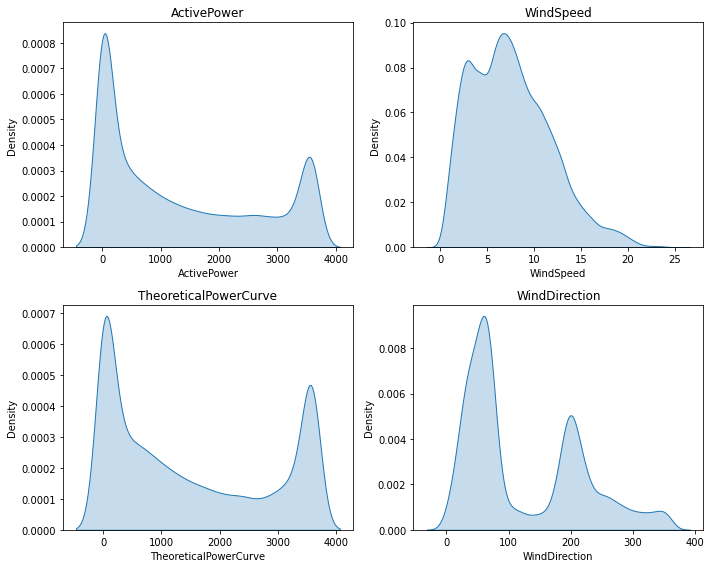

In [ ]:
#plotting the data distribution with the help of Matplotlib library
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data.iloc[:,i+1], shade=True)
    plt.title(data.columns[i+1])
plt.tight_layout()
plt.show()

## Round funtion for wind direction

In [ ]:
def round_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [ ]:
data["RoundDirection"]=data["WindDirection"].apply(round_direction)
data.head(5)

,Date/Time,ActivePower,WindSpeed,TheoreticalPowerCurve,WindDirection,year,month,day,Hour,minute,RoundDirection
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,270
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,270
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,270
3,2018-01-01 00:30:00,419.645904,5.659674,516.127569,271.258087,2018,1,1,0,30,270
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,270


## Assigning the Directions("N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW") with respect to Degrees

In [ ]:
direction_dictionary = {0:"N", 30:"NNE", 60:"NEE", 90:"E", 120:"SEE", 150:"SSE", 180:"S", 210:"SSW", 240:"SWW", 270:"W", 300:"NWW", 330:"NNW"}

def direction_of_wind(x):
  for x in direction_dictionary:
    return direction_dictionary[x]

data['WindCDirection'] = data['RoundDirection'].apply(direction_of_wind)
data.tail(3)

,Date/Time,ActivePower,WindSpeed,TheoreticalPowerCurve,WindDirection,year,month,day,Hour,minute,RoundDirection,WindCDirection
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,2018,12,31,23,30,90,N
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,2018,12,31,23,40,90,N
50529,2018-12-31 23:50:00,2820.466064,9.979332,2779.184096,82.274620,2018,12,31,23,50,90,N


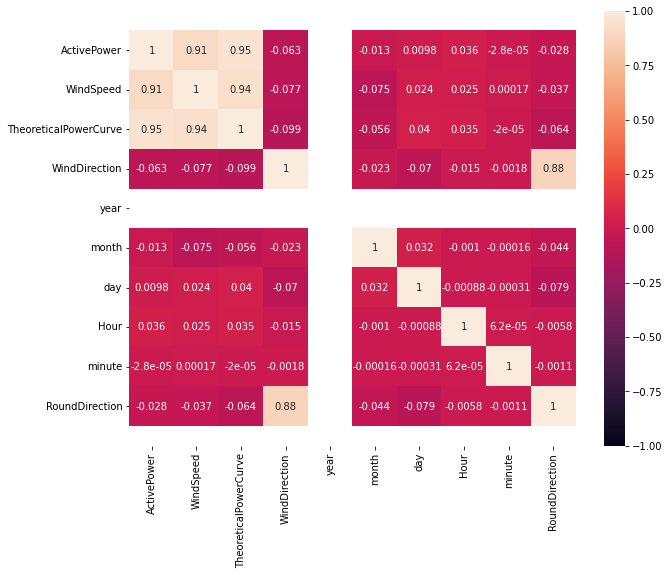

,ActivePower,WindSpeed,TheoreticalPowerCurve,WindDirection,year,month,day,Hour,minute,RoundDirection
ActivePower,1.000000,0.912774,0.949918,-0.062702,NaN,-0.013359,0.009779,0.036355,-0.000028,-0.028036
WindSpeed,0.912774,1.000000,0.944209,-0.077188,NaN,-0.074892,0.023784,0.024754,0.000166,-0.036713
TheoreticalPowerCurve,0.949918,0.944209,1.000000,-0.099076,NaN,-0.055629,0.040273,0.034636,-0.000020,-0.064206
WindDirection,-0.062702,-0.077188,-0.099076,1.000000,NaN,-0.022852,-0.069721,-0.015355,-0.001821,0.880726
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.013359,-0.074892,-0.055629,-0.022852,NaN,1.000000,0.032000,-0.001024,-0.000163,-0.044356
day,0.009779,0.023784,0.040273,-0.069721,NaN,0.032000,1.000000,-0.000883,-0.000310,-0.078696
Hour,0.036355,0.024754,0.034636,-0.015355,NaN,-0.001024,-0.000883,1.000000,0.000062,-0.005810
minute,-0.000028,0.000166,-0.000020,-0.001821,NaN,-0.000163,-0.000310,0.000062,1.000000,-0.001051
RoundDirection,-0.028036,-0.036713,-0.064206,0.880726,NaN,-0.044356,-0.078696,-0.005810,-0.001051,1.000000


In [ ]:
correlation = data.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(correlation, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
correlation

## ->WindSpeed, ActivePower, WindDirection are the Highly Correlated Features

## Droping all irrelavent/unwanted features

In [ ]:
columns = ['year', 'month', 'day', 'Hour', 'minute','RoundDirection']
data = data.drop(columns, axis=1)

In [ ]:
data.head(2)

,Date/Time,ActivePower,WindSpeed,TheoreticalPowerCurve,WindDirection,WindCDirection
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,N
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,N
